In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
#data import
file_location="/Users/SharonLam/Desktop/Online Courses/Bittiger/BA/Project2/"
file_name = "Python_project_eda.csv"
my_data = pd.read_csv(file_location + file_name)

In [3]:
my_data.describe()

,buyer_week_before,clicked_buy_before,existing_buyer,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before
count,566699.000000,495640.000000,566699.000000,495640.000000,495640.000000,89032.000000,170597.000000,170597.000000,566699.000000,170597.000000,170597.000000,5.666990e+05,566699.000000
mean,0.621745,0.257782,0.268135,0.211127,0.933662,67.808838,0.548556,0.479581,0.301036,0.184915,0.099937,9.222149e+18,0.874609
std,1.701956,0.437414,0.442989,0.408109,0.248873,214.097885,0.497638,0.499584,0.458709,0.388230,0.299917,5.319984e+18,0.331162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.002991,0.000000,0.000000,0.000000,0.000000,0.000000,9.099261e+12,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,4.990000,0.000000,0.000000,0.000000,0.000000,0.000000,4.614402e+18,1.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,15.828656,1.000000,0.000000,0.000000,0.000000,0.000000,9.218982e+18,1.000000
75%,0.000000,1.000000,1.000000,0.000000,1.000000,54.795602,1.000000,1.000000,1.000000,0.000000,0.000000,1.382236e+19,1.000000
max,8.000000,1.000000,1.000000,1.000000,1.000000,22519.570000,1.000000,1.000000,1.000000,1.000000,1.000000,1.844674e+19,1.000000


In [4]:
#use winsorize to make outlier data makes more sense
def winsorize_series(w):
    lower = w.quantile(0.05)
    upper = w.quantile(0.95)
    w[w < lower] = lower
    w[w > upper] = upper
    return w

In [5]:
my_data['spend_usd_next_14_days'] = winsorize_series(my_data['spend_usd_next_14_days'])

/Users/SharonLam/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/SharonLam/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
my_data.describe()

,buyer_week_before,clicked_buy_before,existing_buyer,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before
count,566699.000000,495640.000000,566699.000000,495640.000000,495640.000000,89032.000000,170597.000000,170597.000000,566699.000000,170597.000000,170597.000000,5.666990e+05,566699.000000
mean,0.621745,0.257782,0.268135,0.211127,0.933662,49.806191,0.548556,0.479581,0.301036,0.184915,0.099937,9.222149e+18,0.874609
std,1.701956,0.437414,0.442989,0.408109,0.248873,76.009381,0.497638,0.499584,0.458709,0.388230,0.299917,5.319984e+18,0.331162
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.026880,0.000000,0.000000,0.000000,0.000000,0.000000,9.099261e+12,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,4.990000,0.000000,0.000000,0.000000,0.000000,0.000000,4.614402e+18,1.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,15.828656,1.000000,0.000000,0.000000,0.000000,0.000000,9.218982e+18,1.000000
75%,0.000000,1.000000,1.000000,0.000000,1.000000,54.795602,1.000000,1.000000,1.000000,0.000000,0.000000,1.382236e+19,1.000000
max,8.000000,1.000000,1.000000,1.000000,1.000000,289.344500,1.000000,1.000000,1.000000,1.000000,1.000000,1.844674e+19,1.000000


In [7]:
my_data.head()

,buyer_week_before,clicked_buy_before,country,existing_buyer,initial_fop_set,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before
0,0,0.0,IN,0,False,0.0,1.0,NaN,NaN,NaN,0,NaN,NaN,18321316048201303366,1
1,0,0.0,IN,0,False,0.0,1.0,NaN,NaN,NaN,0,NaN,NaN,13705367724816913241,1
2,0,NaN,IN,0,False,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,6605724765451655114,0
3,0,1.0,CA,1,True,1.0,1.0,7.398815,1.0,0.0,1,0.0,0.0,2340067911948261502,1
4,7,1.0,PL,1,True,1.0,1.0,NaN,0.0,1.0,1,0.0,0.0,11891045596810635427,1


In [8]:
#deal with missing value
#assume the nan in people saw cart before means people never saw cart before, as 0
my_data['saw_cart_before'] = my_data['saw_cart_before'].fillna(0)
my_data.head()

,buyer_week_before,clicked_buy_before,country,existing_buyer,initial_fop_set,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before
0,0,0.0,IN,0,False,0.0,1.0,NaN,NaN,NaN,0,NaN,NaN,18321316048201303366,1
1,0,0.0,IN,0,False,0.0,1.0,NaN,NaN,NaN,0,NaN,NaN,13705367724816913241,1
2,0,NaN,IN,0,False,NaN,0.0,NaN,NaN,NaN,0,NaN,NaN,6605724765451655114,0
3,0,1.0,CA,1,True,1.0,1.0,7.398815,1.0,0.0,1,0.0,0.0,2340067911948261502,1
4,7,1.0,PL,1,True,1.0,1.0,NaN,0.0,1.0,1,0.0,0.0,11891045596810635427,1


In [9]:
#assume other nan in other series means never have that action before, as 0. 
#the min data in spend_usd_next_14_days is larger than 0, which assumes nan are people never spend usd in next 14 days
my_data = my_data.fillna(0)
my_data.head()

,buyer_week_before,clicked_buy_before,country,existing_buyer,initial_fop_set,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before
0,0,0.0,IN,0,False,0.0,1.0,0.000000,0.0,0.0,0,0.0,0.0,18321316048201303366,1
1,0,0.0,IN,0,False,0.0,1.0,0.000000,0.0,0.0,0,0.0,0.0,13705367724816913241,1
2,0,0.0,IN,0,False,0.0,0.0,0.000000,0.0,0.0,0,0.0,0.0,6605724765451655114,0
3,0,1.0,CA,1,True,1.0,1.0,7.398815,1.0,0.0,1,0.0,0.0,2340067911948261502,1
4,7,1.0,PL,1,True,1.0,1.0,0.000000,0.0,1.0,1,0.0,0.0,11891045596810635427,1


In [12]:
target_group = my_data [['made_purchase_before','spend_usd_next_14_days','user_added_credit_card','user_added_dcb',\
                        'user_added_fop','user_added_gift_card','user_added_paypal']][my_data['saw_cart_before'] == 1]

In [13]:
target_group.head()

,made_purchase_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal
0,0.0,0.000000,0.0,0.0,0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0,0.0,0.0
3,1.0,7.398815,1.0,0.0,1,0.0,0.0
4,1.0,0.000000,0.0,1.0,1,0.0,0.0
5,0.0,0.000000,0.0,0.0,0,0.0,0.0


In [49]:
target_group.count()

made_purchase_before      462760
spend_usd_next_14_days    462760
user_added_credit_card    462760
user_added_dcb            462760
user_added_fop            462760
user_added_gift_card      462760
user_added_paypal         462760
dtype: int64

In [109]:
#Target group includes people never made purchase before and people have made purchase in Q2
#Check diff payment method's conversion rate in people who made purchase in Q2
def Q2buyersConversionRate (payment_method):
    totalQ2_series = target_group[['made_purchase_before']][(target_group[payment_method] == 1)]
    totalQ2 = totalQ2_series.count()
    buyerQ2_series = target_group[['made_purchase_before']][(target_group[payment_method] == 1) & (target_group.made_purchase_before == 1)]
    buyerQ2 = buyerQ2_series.count()
    conversion_rate = buyerQ2/float(totalQ2)
    return conversion_rate

In [110]:
#payment_method = target_group['user_added_credit_card']
cc_cr = Q2buyersConversionRate('user_added_credit_card')
dcb_cr = Q2buyersConversionRate('user_added_dcb')
fop_cr = Q2buyersConversionRate ('user_added_fop')
gc_cr = Q2buyersConversionRate ('user_added_gift_card')
pp_cr = Q2buyersConversionRate ('user_added_paypal')

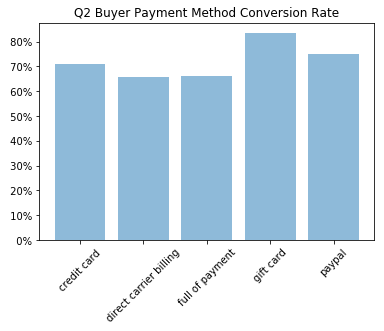

In [167]:
x = [cc_cr, dcb_cr, fop_cr, gc_cr, pp_cr]
name = ('0','credit card', 'direct carrier billing', 'full of payment', 'gift card','paypal')
ind = np.arange(5)
fig,ax = plt.subplots()
x1 = plt.bar(ind, x, align ='center', alpha =0.5)
ax.set_xticklabels(name, rotation=45)
ax.set_title('Q2 Buyer Payment Method Conversion Rate')
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals])

In [203]:
#Target group of people never make purchase in Q2 but buy things in next 14 days
#Check their payment method conversion rate
def Q3NewBuyersConversionRate (payment_method1):
    totalQ3_Series = target_group[['spend_usd_next_14_days']][(target_group['made_purchase_before'] == 0)\
                                                              & (target_group[payment_method1] == 1)] 
    totalQ3 = totalQ3_Series.count() 
    NewBuyersQ3_Series = target_group[['spend_usd_next_14_days']][(target_group['spend_usd_next_14_days'] > 0.001)\
                                                                  & (target_group['made_purchase_before'] == 0)\
                                                                  & (target_group[payment_method1] == 1)]
    NewBuyersQ3 = NewBuyersQ3_Series.count()
    NewBuyerCR = NewBuyersQ3 / float(totalQ3)
    return NewBuyerCR

In [204]:
pp_rt1 = Q3NewBuyersConversionRate ('user_added_paypal')
gc_rt1 = Q3NewBuyersConversionRate ('user_added_gift_card')
dcb_rt1 = Q3NewBuyersConversionRate ('user_added_dcb')
cc_rt1 = Q3NewBuyersConversionRate ('user_added_credit_card')
fop_rt1 = Q3NewBuyersConversionRate ('user_added_fop')

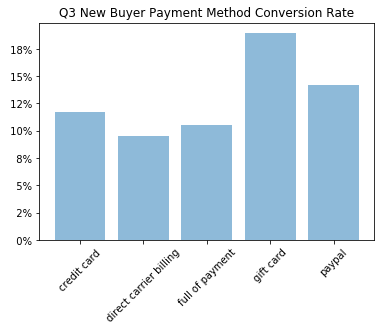

In [205]:
x = [cc_rt1, dcb_rt1, fop_rt1, gc_rt1, pp_rt1]
name = ('0','credit card', 'direct carrier billing', 'full of payment', 'gift card','paypal')
ind = np.arange(5)
fig,ax = plt.subplots()
x1 = plt.bar(ind, x, align ='center', alpha =0.5)
ax.set_xticklabels(name, rotation=45)
ax.set_title('Q3 New Buyer Payment Method Conversion Rate')
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals])